In [1]:
import benchmark
%load_ext autoreload
%autoreload 2

from benchmark import *
from DO import *
from ODO import *
from MWU import *
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = False

In [2]:
game_solving_functions = [DO_gurobi, DO_scipy, lp, multiplicative_weights_update, online_double_oracle]
# game_solving_functions = [online_double_oracle]
game_solving_functions_np = np.array(game_solving_functions)

min_size = 100
max_size = 2000
step = 100

max_time = 2

iters = 20

In [3]:
solvers_times = np.zeros(((max_size-min_size)//step + 1, len(game_solving_functions)))
solvers_iters = np.zeros(((max_size-min_size)//step + 1, len(game_solving_functions)))

active_solvers = [i for i in range(len(game_solving_functions))]
print(active_solvers)

generator = GaussianSumGameGenerator(bank=iters, bank_size=max_size)
print("Generator ready")
pbar = trange(min_size, max_size + 1, step)
pbar.set_postfix({"Game size": min_size})
for i, game_size in enumerate(pbar):
    results = benchmark_game_solver(game_solving_functions_np[active_solvers],
                                    generator.generate,
                                    [(), (), (), (), ()],
                                    (game_size,), iters, [True, True, False, True, True],
                                    verbose=False)
    solvers_times[i][active_solvers] = results['times'].mean(axis=1)
    solvers_iters[i][active_solvers] = results['iterations'].mean(axis=1)

    postfix = {"Game size": game_size , "Generation time": results['generating_time']}
    for j in active_solvers:
        postfix[game_solving_functions[j].__name__] = f'{solvers_times[i, j]:.2f}'
    active_solvers[:] = [j for j in active_solvers if solvers_times[i, j] < max_time]
    pbar.set_postfix(postfix)


[0, 1, 2, 3, 4]
Generator ready


  0%|          | 0/20 [00:00<?, ?it/s, Game size=100]

Set parameter Username
Academic license - for non-commercial use only - expires 2025-11-05


100%|██████████| 20/20 [08:59<00:00, 26.99s/it, Game size=2000, Generation time=0.000761, DO_gurobi=0.03, DO_scipy=0.02, lp=1.97]                                                             


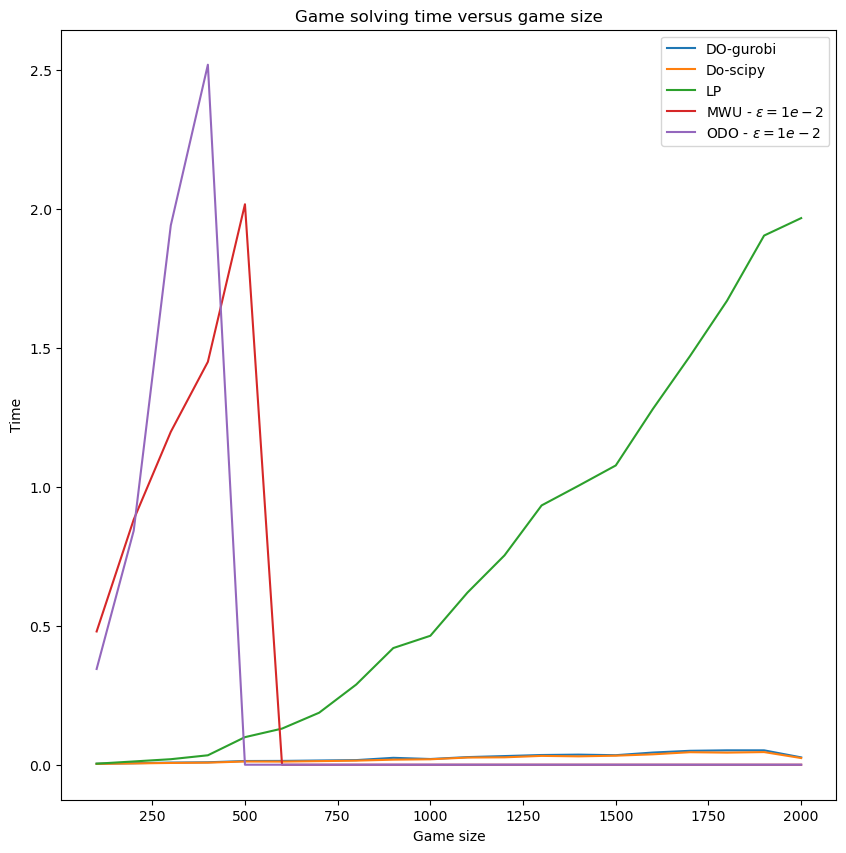

In [4]:
plt.subplots(figsize=(10, 10))
# plt.plot(range(min_size, 5001, step), solvers_times_reserve)
plt.plot(range(min_size, max_size + 1, step), solvers_times)
plt.legend(['DO-gurobi', 'Do-scipy', 'LP', 'MWU - $\\varepsilon=1e-2$', 'ODO - $\\varepsilon=1e-2$'])
plt.xlabel('Game size')
plt.ylabel('Time')
plt.title('Game solving time versus game size')
plt.savefig('solving_times_2.png')

In [15]:
from copy import deepcopy
solvers_iters_reserve = deepcopy(solvers_iters)
solvers_times_reserve = deepcopy(solvers_times)
solvers_iters_reserve2 = deepcopy(solvers_iters)
solvers_times_reserve2 = deepcopy(solvers_times)

In [38]:
solvers_times_reserve[41:] = None
solvers_iters_reserve[41:] = None

In [75]:
np.save('solvers_iters_mwu_500.npy', solvers_iters)
np.save('solvers_times_mwu_500.npy', solvers_times)

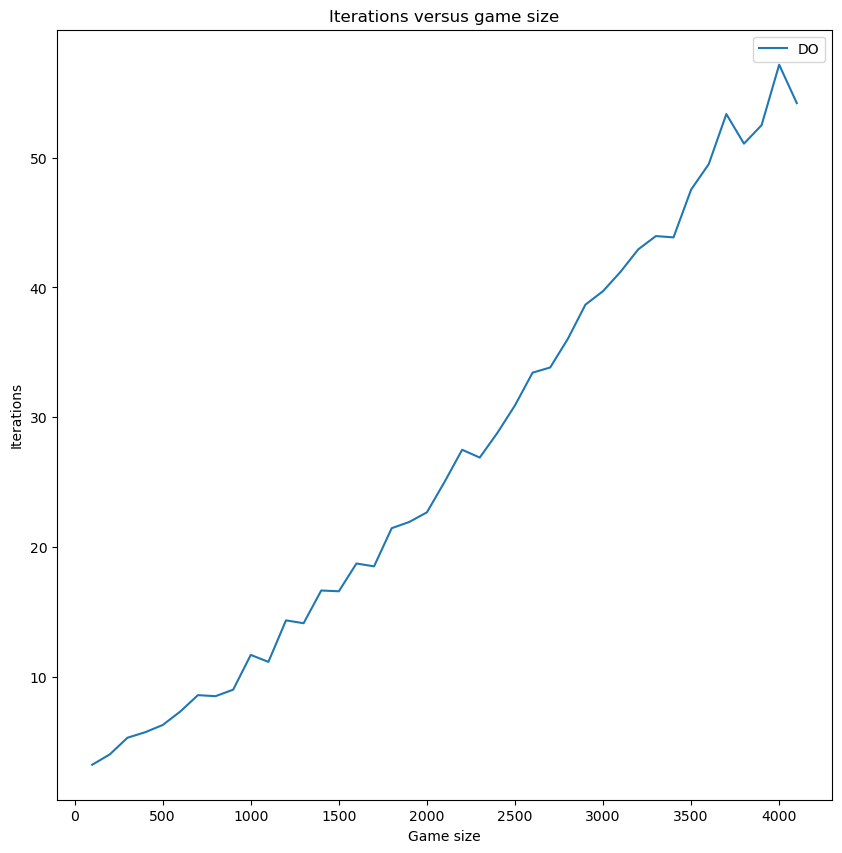

In [52]:
plt.subplots(figsize=(10, 10))
plt.plot(range(min_size, 5001, step), solvers_iters_reserve[:,0])
#plt.plot(range(min_size, max_size + 1, step), solvers_iters)
plt.legend(['DO'])
plt.xlabel('Game size')
plt.ylabel('Iterations')
plt.title('Iterations versus game size')
plt.savefig('DO_iterations.png')

In [5]:
print(solvers_times)

[[0.00353288 0.00302332 0.00369733 0.47967266 0.34462403]
 [0.00535473 0.00461945 0.01178262 0.882465   0.84238827]
 [0.00770068 0.00638193 0.01986847 1.1983536  1.94147849]
 [0.00879231 0.0074463  0.03396642 1.4503161  2.51980437]
 [0.01332846 0.01163793 0.09922332 2.01748337 0.        ]
 [0.01370198 0.01122964 0.13002695 0.         0.        ]
 [0.01520318 0.01289664 0.18717297 0.         0.        ]
 [0.01659991 0.01468972 0.28854766 0.         0.        ]
 [0.024831   0.01820897 0.41997443 0.         0.        ]
 [0.02056846 0.01957304 0.46422757 0.         0.        ]
 [0.02742889 0.02582789 0.61957984 0.         0.        ]
 [0.03113753 0.02660942 0.75369637 0.         0.        ]
 [0.03495683 0.03180768 0.93341827 0.         0.        ]
 [0.03633776 0.03013771 1.0045668  0.         0.        ]
 [0.03430181 0.03254705 1.07728578 0.         0.        ]
 [0.04383286 0.0374353  1.2805648  0.         0.        ]
 [0.05011649 0.04505531 1.47070471 0.         0.        ]
 [0.05183445 0